In [1]:
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pip install requests


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests 

In [4]:
url="https://remoteok.com/api"

In [5]:
time.sleep(1) # 1 second time delay as per the website's policy

In [6]:
response=requests.get(url)

print(response.content)

response.text

In [13]:
dataset=response.json()

dataset

In [15]:
print(dataset[0]) #remove this

{'last_updated': 1755302405, 'legal': "API Terms of Service: Please link back (with follow, and without nofollow!) to the URL on Remote OK and mention Remote OK as a source, so we get traffic back from your site. If you do not we'll have to suspend API access.\n\nPlease don't use the Remote OK logo without written permission as it's a registered trademark, please DO use our name Remote OK though."}


In [17]:
data=dataset[1:]

In [26]:
len(data)

95

In [31]:
filtered_data=[x for x in data if "data" in x.get("position","").lower()] #if filtering has to be done

In [76]:
df=pd.DataFrame(data)

In [77]:
df.head()

,slug,id,epoch,date,company,company_logo,position,tags,logo,description,location,salary_min,salary_max,apply_url,url,original,verified
0,remote-senior-devops-engineer-echo-base-1093825,1093825,1755248403,2025-08-15T09:00:03+00:00,Echo Base,https://remoteok.com/assets/img/jobs/75c329087...,Senior DevOps Engineer,"[web3, crypto, cryptocurrency, system, swift, ...",https://remoteok.com/assets/img/jobs/75c329087...,<p>Echo Base Global is a digital finance compa...,,60000,150000,https://remoteOK.com/remote-jobs/remote-senior...,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN
1,remote-bd-manager-powered-by-pioneer-1093808,1093808,1755162003,2025-08-14T09:00:03+00:00,Powered by Pioneer,,BD Manager,"[manager, defi, crypto, engineering]",,"<p><span style=""font-size: medium;"">APX is the...",,45000,90000,https://remoteOK.com/remote-jobs/remote-bd-man...,https://remoteOK.com/remote-jobs/remote-bd-man...,NaN,NaN
2,remote-senior-elixir-engineer-sanctuary-comput...,1093807,1755102755,2025-08-13T16:32:35+00:00,Sanctuary Computer,https://remoteOK.com/assets/img/jobs/7287a4540...,Senior Elixir Engineer,"[exec, dev, backend, full stack, saas, senior,...",https://remoteOK.com/assets/img/jobs/7287a4540...,<p><strong>Original job post link:</strong></p...,,150000,220000,https://remoteOK.com/remote-jobs/remote-senior...,https://remoteOK.com/remote-jobs/remote-senior...,True,NaN
3,remote-data-analyst-p2p-org-1093806,1093806,1755097202,2025-08-13T15:00:02+00:00,P2P. org,https://remoteok.com/assets/img/jobs/120086150...,Data Analyst,"[analyst, defi, crypto, system, consultancy, t...",https://remoteok.com/assets/img/jobs/120086150...,"<p style=""min-height:1.5em""><a target=""_blank""...",Delhi,55000,90000,https://remoteOK.com/remote-jobs/remote-data-a...,https://remoteOK.com/remote-jobs/remote-data-a...,NaN,NaN
4,remote-senior-staff-security-engineer-ethena-l...,1093805,1755093603,2025-08-13T14:00:03+00:00,Ethena Labs,https://remoteok.com/assets/img/jobs/ea9df5758...,Senior Staff Security Engineer,"[security, defi, crypto, ethereum, full-stack,...",https://remoteok.com/assets/img/jobs/ea9df5758...,"<p><b style=""font-size: 18px"">Who We Are:</b><...",Globally Remote,60000,130000,https://remoteOK.com/remote-jobs/remote-senior...,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN


In [78]:
df.columns

Index(['slug', 'id', 'epoch', 'date', 'company', 'company_logo', 'position',
       'tags', 'logo', 'description', 'location', 'salary_min', 'salary_max',
       'apply_url', 'url', 'original', 'verified'],
      dtype='object')

In [79]:
df=df[['company','position','location','salary_min','salary_max']]

In [80]:
df.head()

,company,position,location,salary_min,salary_max
0,Echo Base,Senior DevOps Engineer,,60000,150000
1,Powered by Pioneer,BD Manager,,45000,90000
2,Sanctuary Computer,Senior Elixir Engineer,,150000,220000
3,P2P. org,Data Analyst,Delhi,55000,90000
4,Ethena Labs,Senior Staff Security Engineer,Globally Remote,60000,130000


In [81]:
import numpy as np
import re

In [82]:
df.replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [83]:
df.isnull().sum()

company        2
position       2
location      38
salary_min     0
salary_max     0
dtype: int64

In [84]:
df.dropna(inplace=True)

In [88]:
df.reset_index(drop=True,inplace=True)

In [89]:
df.head()

,company,position,location,salary_min,salary_max
0,P2P. org,Data Analyst,Delhi,55000,90000
1,Ethena Labs,Senior Staff Security Engineer,Globally Remote,60000,130000
2,The Trevor Project,Public Training Associate,Remote - United States,65000,150000
3,NTD software,FullStack Engineer,Latin America,60000,125000
4,Bonfire Studios,Character Concept Artist,United States,0,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     56 non-null     object
 1   position    56 non-null     object
 2   location    56 non-null     object
 3   salary_min  56 non-null     int64 
 4   salary_max  56 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ KB


In [133]:
df.describe()

,salary_min,salary_max,avg_salary
count,56.000000,56.000000,56.000000
mean,53928.571429,97455.357143,75691.964286
std,26653.744163,43845.003529,34072.882815
min,0.000000,0.000000,0.000000
25%,47500.000000,83750.000000,66875.000000
50%,60000.000000,100000.000000,76875.000000
75%,65000.000000,125000.000000,95000.000000
max,150000.000000,162500.000000,150000.000000


In [134]:
df = df[(df['salary_min'] > 0) & (df['salary_max'] > 0)]
df = df.dropna(subset=['salary_min','salary_max'])

In [137]:
df["avg_salary"]=(df['salary_min']+df['salary_max'])/2

In [138]:
df.head()

,company,position,location,salary_min,salary_max,avg_salary
0,P2P. org,Data Analyst,Delhi,55000,90000,72500.0
1,Ethena Labs,Senior Staff Security Engineer,Globally Remote,60000,130000,95000.0
2,The Trevor Project,Public Training Associate,Remote - United States,65000,150000,107500.0
3,NTD software,FullStack Engineer,Latin America,60000,125000,92500.0
5,Coins.ph,Strategy Manager,"Taguig City, Metro Manila, Philippines",47500,100000,73750.0


In [139]:
df.describe() 

,salary_min,salary_max,avg_salary
count,50.000000,50.000000,50.000000
mean,60400.000000,109150.000000,84775.000000
std,19963.998209,29244.788477,22746.229223
min,20000.000000,40000.000000,30000.000000
25%,50000.000000,90000.000000,72500.000000
50%,60000.000000,110000.000000,85000.000000
75%,65000.000000,126875.000000,98750.000000
max,150000.000000,162500.000000,150000.000000


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

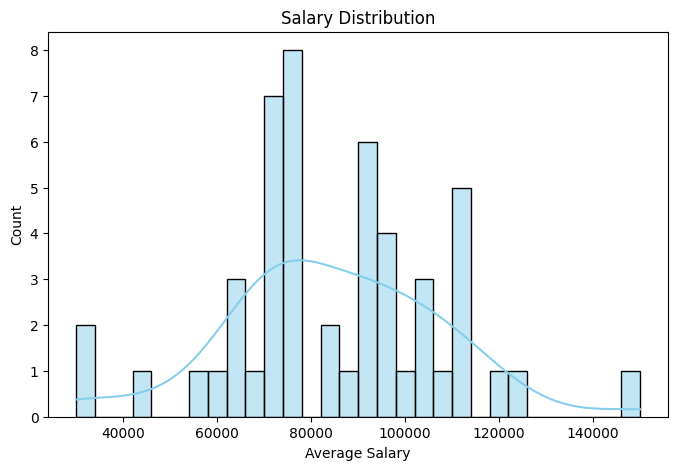

In [143]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_salary'], kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title("Salary Distribution")
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.show()

/var/folders/g6/hj_lnk1s6_vgcxt9232v2c3m0000gn/T/ipykernel_13417/3454404565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies_count.index, y=top_companies_count.values, palette="viridis")


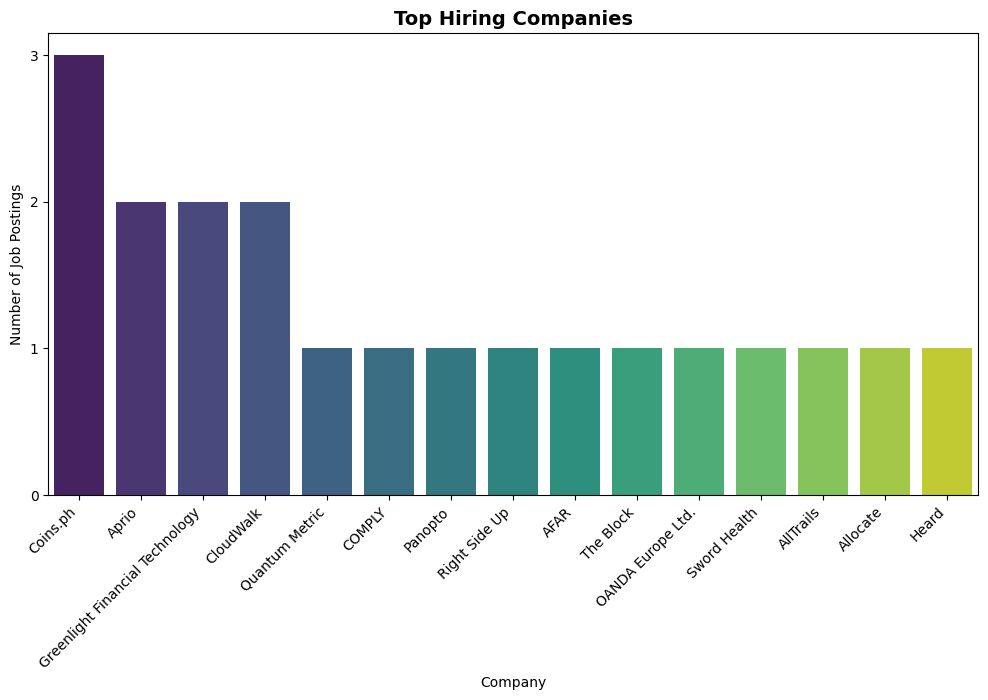

In [144]:
plt.figure(figsize=(12,6))
top_companies_count = df['company'].value_counts().head(15)  
sns.barplot(x=top_companies_count.index, y=top_companies_count.values, palette="viridis")
plt.title("Top Hiring Companies")
plt.xlabel("Company")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

/var/folders/g6/hj_lnk1s6_vgcxt9232v2c3m0000gn/T/ipykernel_13417/3851302722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="dark")


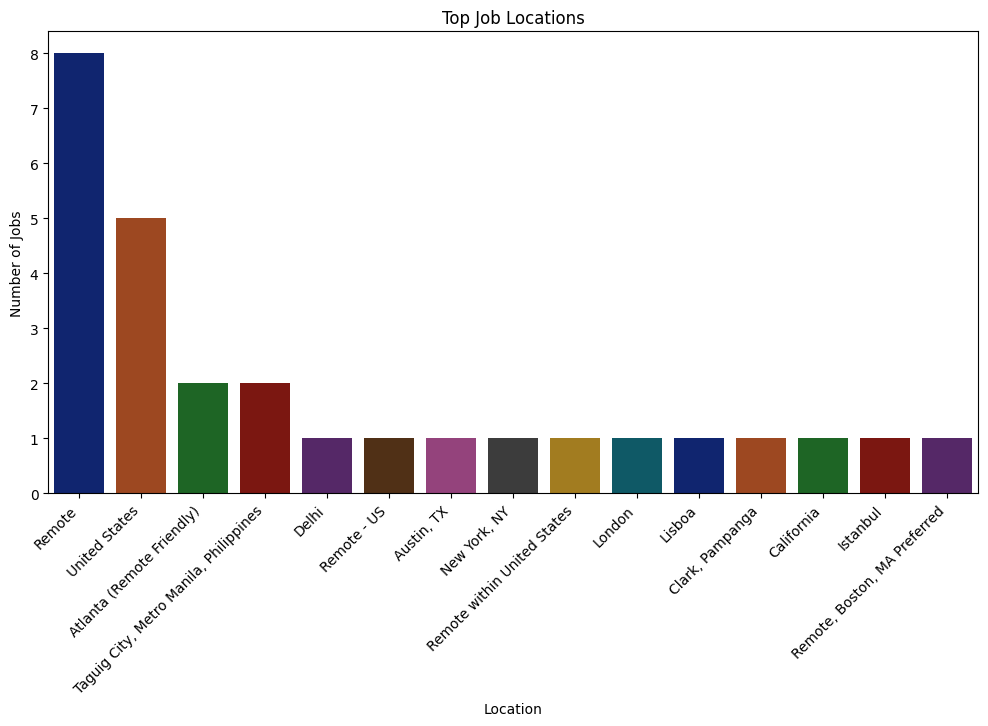

In [153]:
plt.figure(figsize=(12,6))
top_locations = df['location'].value_counts().head(15)
sns.barplot(x=top_locations.index, y=top_locations.values, palette="dark")
plt.title("Top Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

/var/folders/g6/hj_lnk1s6_vgcxt9232v2c3m0000gn/T/ipykernel_13417/1969683565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies_salary.index, y=top_companies_salary.values, palette="Set3", edgecolor="black")


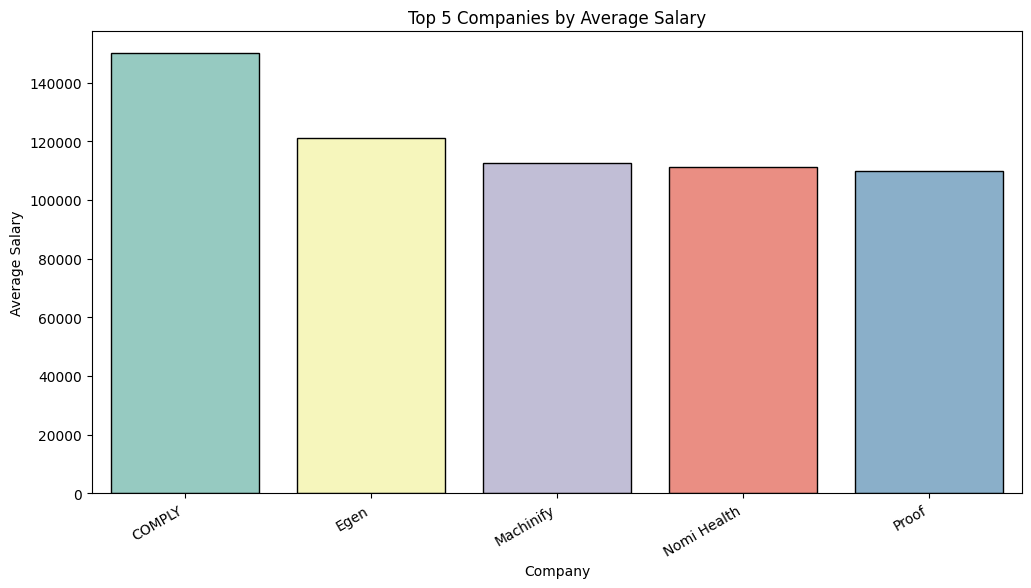

In [146]:
plt.figure(figsize=(12,6))
top_companies_salary = df.groupby('company')['avg_salary'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=top_companies_salary.index, y=top_companies_salary.values, palette="Set3", edgecolor="black")
plt.title("Top 5 Companies by Average Salary")
plt.xlabel("Company")
plt.ylabel("Average Salary")
plt.xticks(rotation=30, ha='right')
plt.show()

/var/folders/g6/hj_lnk1s6_vgcxt9232v2c3m0000gn/T/ipykernel_13417/106736871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positions_salary.index, y=top_positions_salary.values, palette="magma", edgecolor="black")


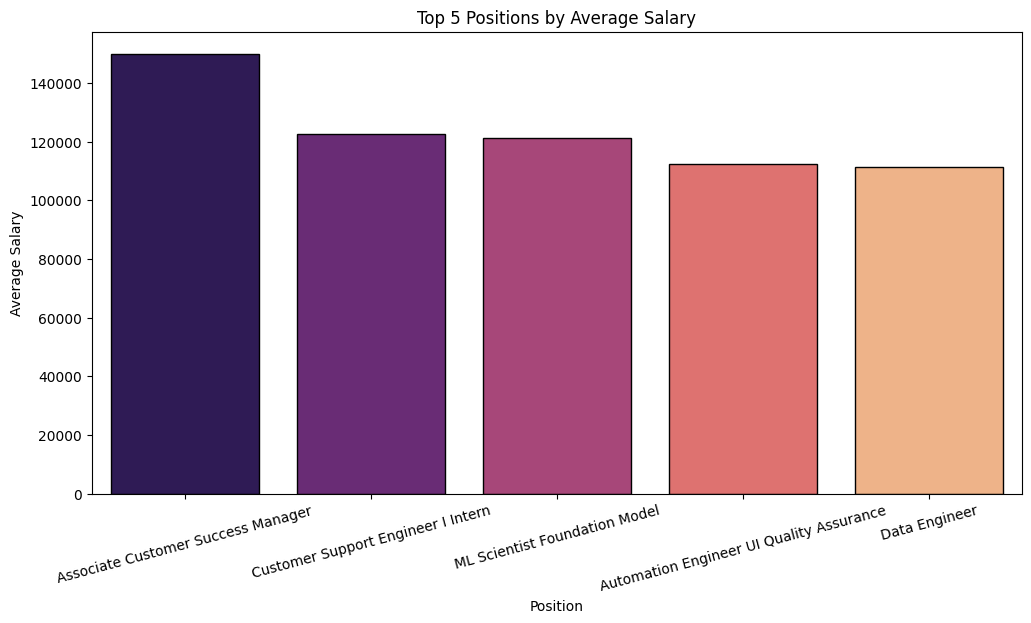

In [147]:
plt.figure(figsize=(12,6))
top_positions_salary = df.groupby('position')['avg_salary'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=top_positions_salary.index, y=top_positions_salary.values, palette="magma", edgecolor="black")
plt.title("Top 5 Positions by Average Salary")
plt.xlabel("Position")
plt.ylabel("Average Salary")
plt.xticks(rotation=15)
plt.show()